In [192]:
import numpy as np
import pandas as pd
import pickle
import torch
import seaborn as sns
import matplotlib.pyplot as plt

In [193]:
DATA_PATH = '../data/origin_entropies_wo_agg'
colors = {
    'w_false': 'red',
    'w_true': 'green',
    'wo_false': 'blue',
    'wo_true': 'purple'
}

## nq_dataset

In [142]:
subsamples = {}
for subsample_name in ('w_false', 'w_true', 'wo_false', 'wo_true'):
    with open(f'{DATA_PATH}/all_entropies_nq_dataset_{subsample_name}.pickle', 'rb') as file:
        all_entropies = pickle.load(file)
    subsamples[subsample_name] = [entropy[0][2].item() for entropy in all_entropies]

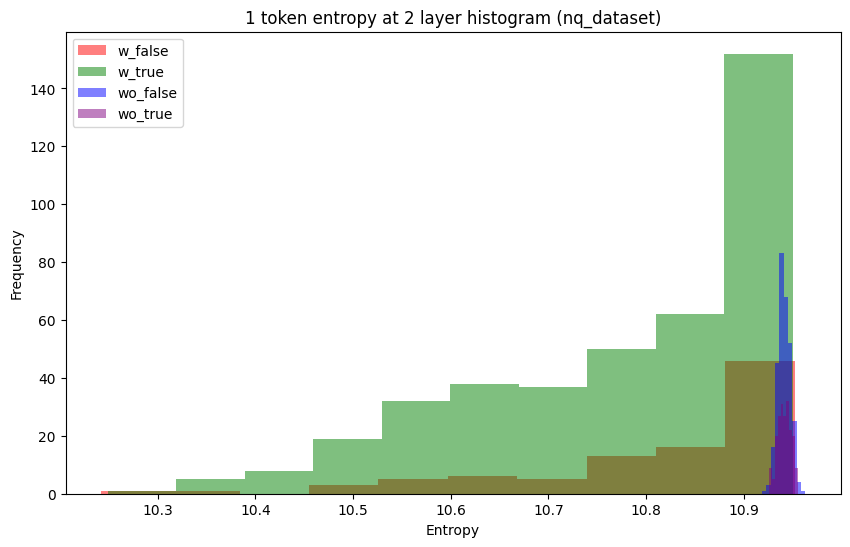

In [143]:
plt.figure(figsize=(10, 6))
for key, values in subsamples.items():
    plt.hist(values, alpha=0.5, label=key, color=colors[key])

plt.title('1 token entropy at 2 layer histogram (nq_dataset)')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

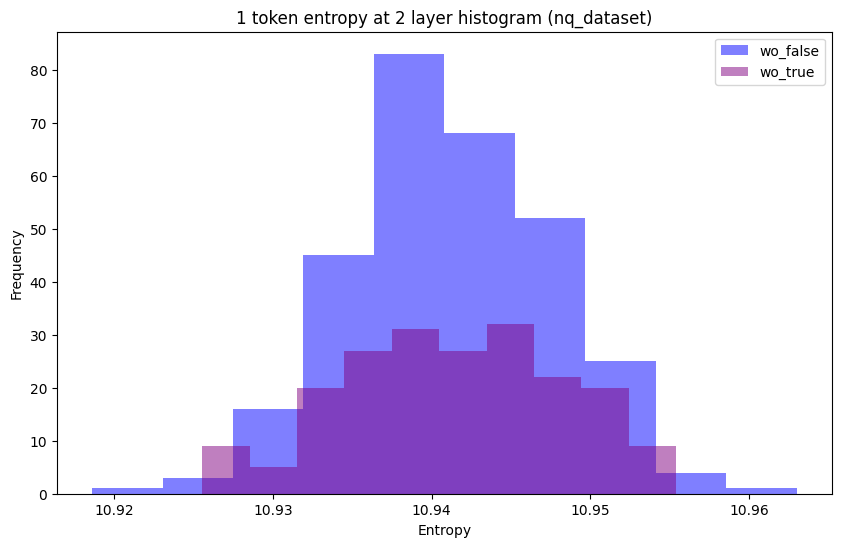

In [144]:
plt.figure(figsize=(10, 6))
for key, values in subsamples.items():
    if key in ('wo_false', 'wo_true'):
        plt.hist(values, alpha=0.5, label=key, color=colors[key])

plt.title('1 token entropy at 2 layer histogram (nq_dataset)')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

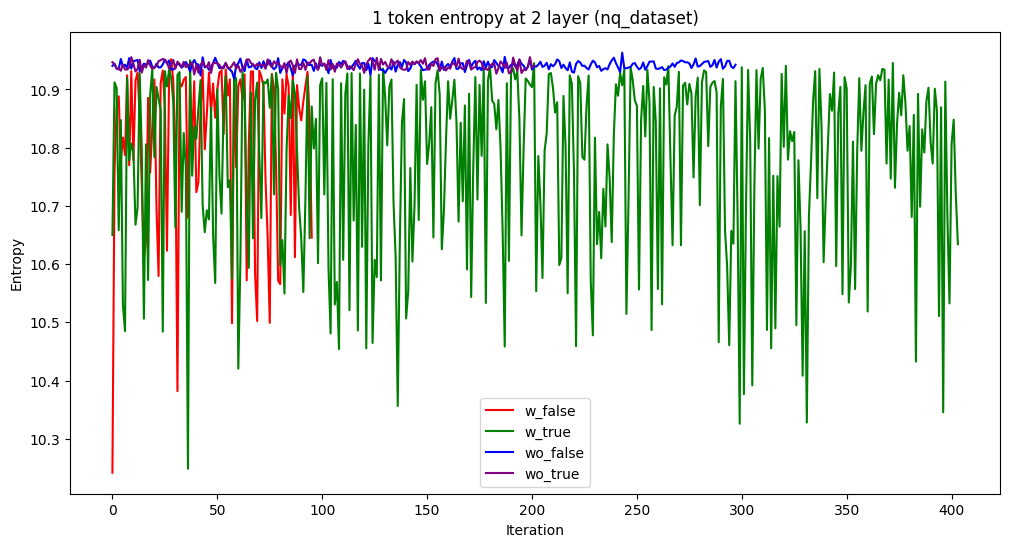

In [145]:
plt.figure(figsize=(12, 6))
for key, values in subsamples.items():
    plt.plot(values, label=key, color=colors[key])

plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.title('1 token entropy at 2 layer (nq_dataset)')
plt.legend()
plt.show()

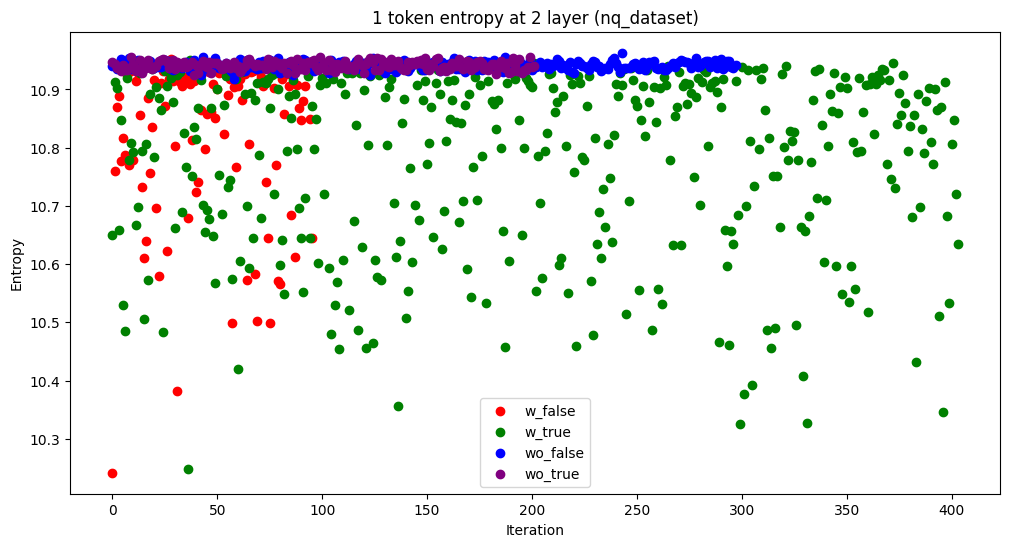

In [146]:
plt.figure(figsize=(12, 6))
for key, values in subsamples.items():
    plt.scatter(range(len(values)), values, label=key, color=colors[key])

plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.title('1 token entropy at 2 layer (nq_dataset)')
plt.legend()
plt.show()

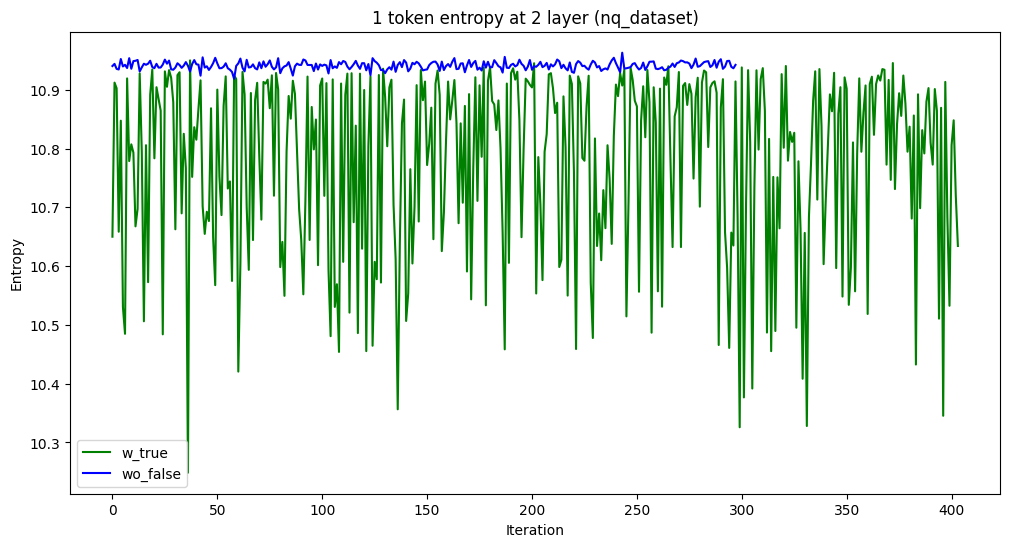

In [147]:
plt.figure(figsize=(12, 6))
for key, values in subsamples.items():
    if key in ('wo_false', 'w_true'):
        plt.plot(values, label=key, color=colors[key])

plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.title('1 token entropy at 2 layer (nq_dataset)')
plt.legend()
plt.show()

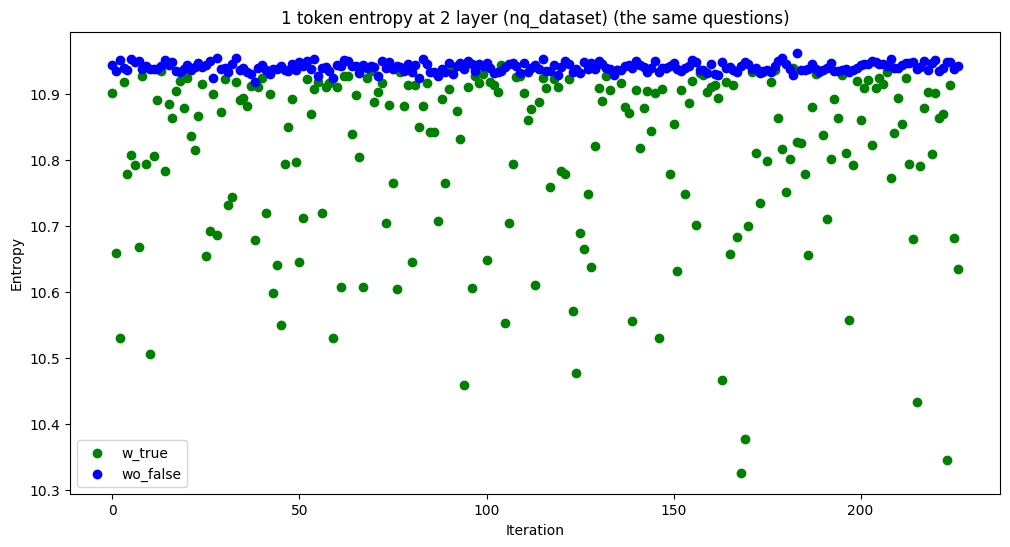

In [148]:
nq_dataset = pd.read_csv('../data/adaptive_rag_natural_questions.csv')

wo_false_indices = set(nq_dataset[nq_dataset['is_correct_wo_context'] == 0].index)
w_true_indices = set(nq_dataset[nq_dataset['is_correct_w_context'] == 1].index)

filtered_indices = wo_false_indices & w_true_indices

wo_false_idx = list(wo_false_indices)
index_map_wo_false = {i: wo_false_idx[i] for i in range(len(wo_false_idx))}
w_true_idx = list(w_true_indices)
index_map_w_true = {i: w_true_idx[i] for i in range(len(w_true_idx))}

all_entropies_wo0_w1 = {
    'w_true': [],
    'wo_false': [],
}
nq_dataset_entropies_wo0_w1 = {
    'w_true': [subsamples['w_true'][i] for i in range(len(subsamples['w_true']))
               if index_map_w_true.get(i) in filtered_indices],
    'wo_false': [subsamples['wo_false'][i] for i in range(len(subsamples['wo_false']))
                 if index_map_wo_false.get(i) in filtered_indices],
}
all_entropies_wo0_w1['w_true'] += nq_dataset_entropies_wo0_w1['w_true']
all_entropies_wo0_w1['wo_false'] += nq_dataset_entropies_wo0_w1['wo_false']

plt.figure(figsize=(12, 6))
for key, values in nq_dataset_entropies_wo0_w1.items():
    plt.scatter(range(len(values)), values, label=key, color=colors[key])

plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.title('1 token entropy at 2 layer (nq_dataset) (the same questions)')
plt.legend()
plt.show()

In [149]:
eos_subsamples = {}
for subsample_name in ('w_false', 'w_true', 'wo_false', 'wo_true'):
    with open(f'{DATA_PATH}/all_eos_entropies_nq_dataset_{subsample_name}.pickle', 'rb') as file:
        all_entropies = pickle.load(file)
    eos_subsamples[subsample_name] = [entropy[-1].item() for entropy in all_entropies]

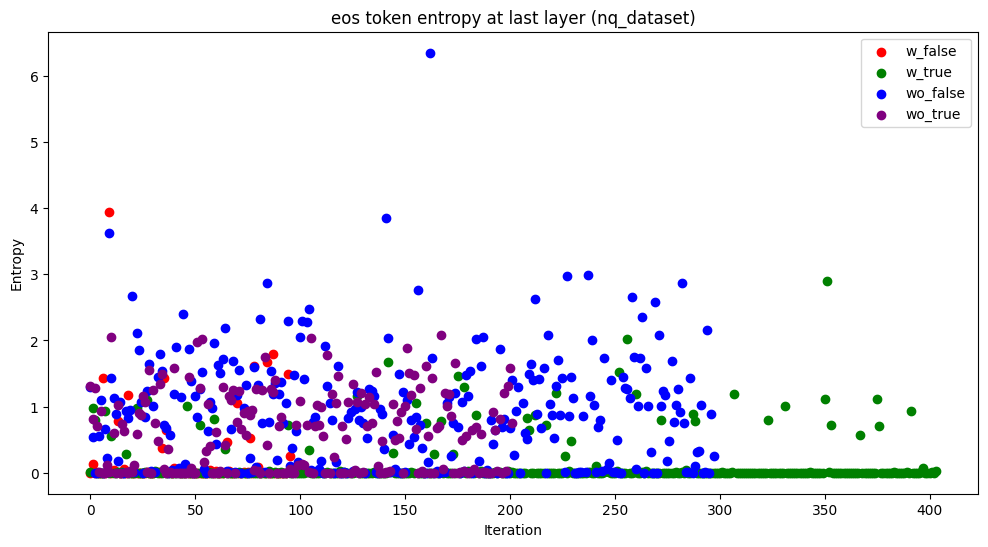

In [150]:
plt.figure(figsize=(12, 6))
for key, values in eos_subsamples.items():
    plt.scatter(range(len(values)), values, label=key, color=colors[key])

plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.title('eos token entropy at last layer (nq_dataset)')
plt.legend()
plt.show()

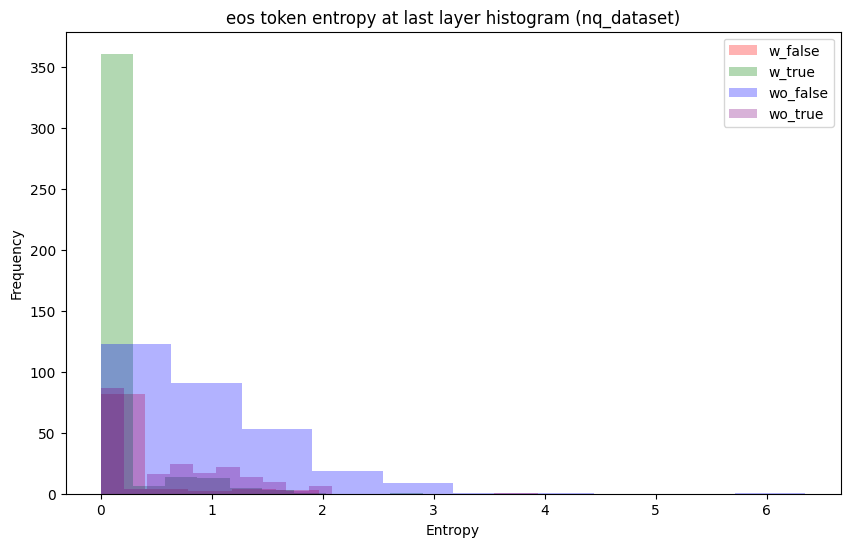

In [151]:
plt.figure(figsize=(10, 6))
for key, values in eos_subsamples.items():
    plt.hist(values, alpha=0.3, label=key, color=colors[key])

plt.title('eos token entropy at last layer histogram (nq_dataset)')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## wiki_multi_dataset

In [152]:
subsamples = {}
for subsample_name in ('w_false', 'w_true', 'wo_false', 'wo_true'):
    with open(f'{DATA_PATH}/all_entropies_wiki_multi_dataset_{subsample_name}.pickle', 'rb') as file:
        all_entropies = pickle.load(file)
    subsamples[subsample_name] = [entropy[0][2].item() for entropy in all_entropies]

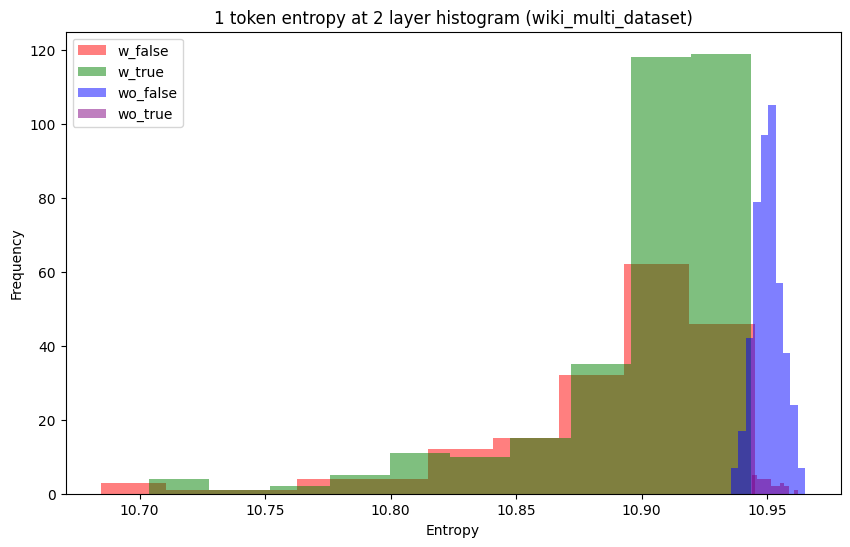

In [153]:
plt.figure(figsize=(10, 6))
for key, values in subsamples.items():
    plt.hist(values, alpha=0.5, label=key, color=colors[key])

plt.title('1 token entropy at 2 layer histogram (wiki_multi_dataset)')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

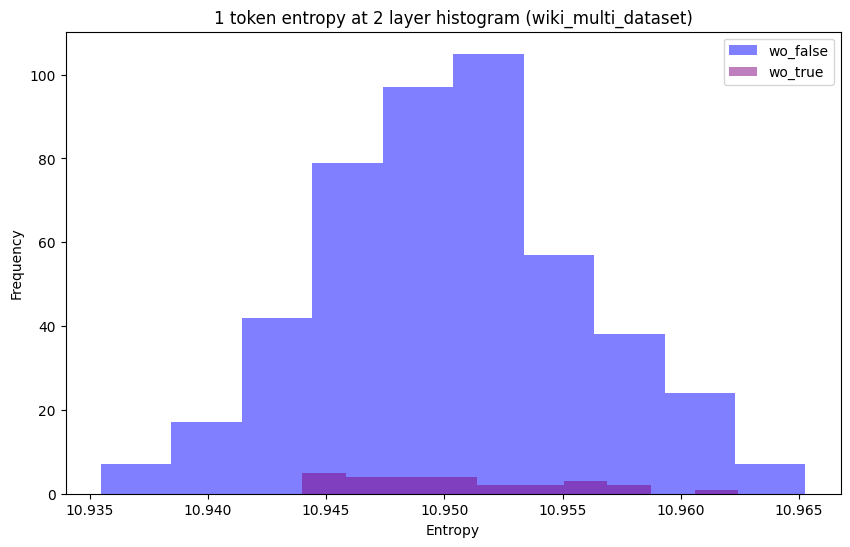

In [154]:
plt.figure(figsize=(10, 6))
for key, values in subsamples.items():
    if key in ('wo_false', 'wo_true'):
        plt.hist(values, alpha=0.5, label=key, color=colors[key])

plt.title('1 token entropy at 2 layer histogram (wiki_multi_dataset)')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

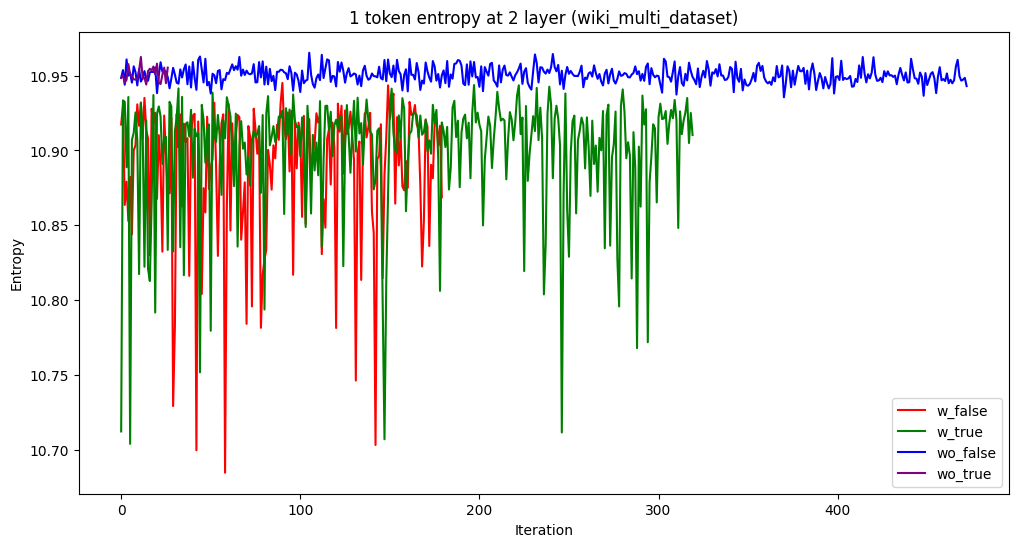

In [155]:
plt.figure(figsize=(12, 6))
for key, values in subsamples.items():
    plt.plot(values, label=key, color=colors[key])

plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.title('1 token entropy at 2 layer (wiki_multi_dataset)')
plt.legend()
plt.show()

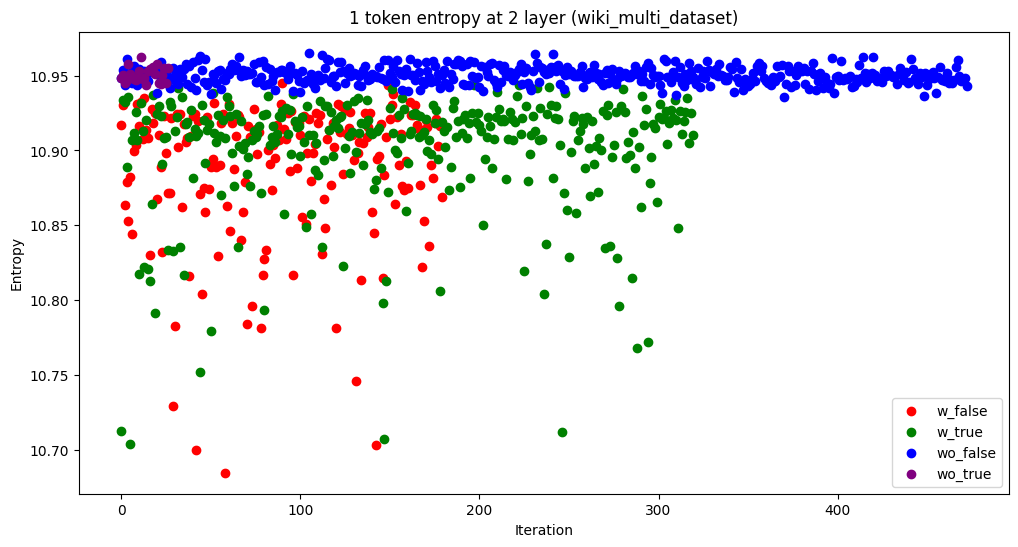

In [156]:
plt.figure(figsize=(12, 6))
for key, values in subsamples.items():
    plt.scatter(range(len(values)), values, label=key, color=colors[key])

plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.title('1 token entropy at 2 layer (wiki_multi_dataset)')
plt.legend()
plt.show()

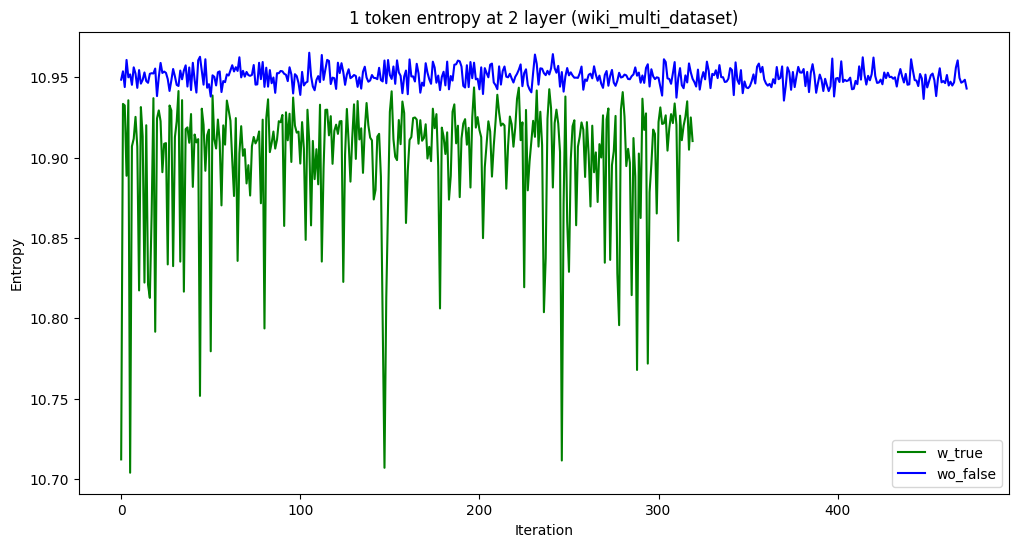

In [157]:
plt.figure(figsize=(12, 6))
for key, values in subsamples.items():
    if key in ('wo_false', 'w_true'):
        plt.plot(values, label=key, color=colors[key])

plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.title('1 token entropy at 2 layer (wiki_multi_dataset)')
plt.legend()
plt.show()

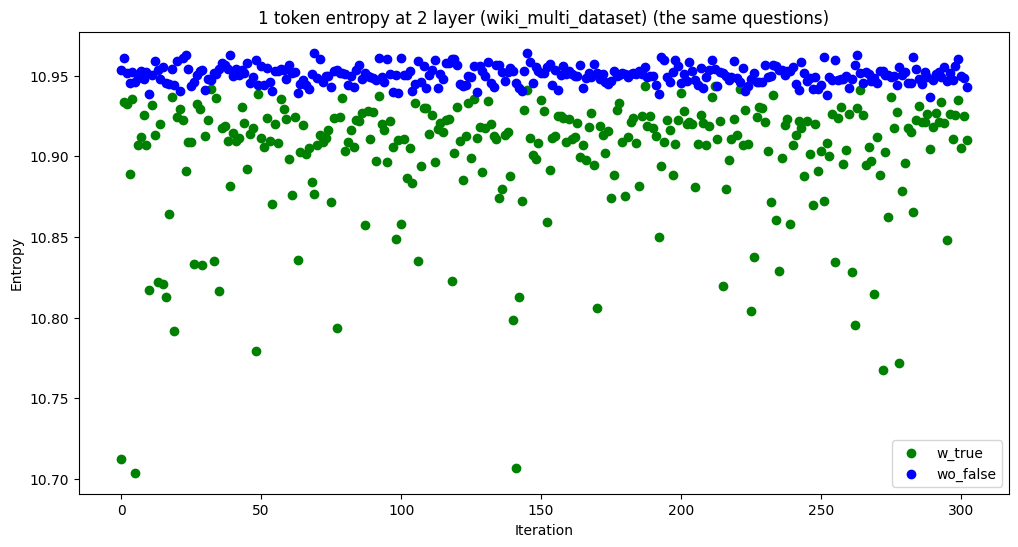

In [158]:
wiki_multi_dataset = pd.read_csv('../data/adaptive_rag_2wikimultihopqa.csv')
wo_false_indices = set(wiki_multi_dataset[wiki_multi_dataset['is_correct_wo_context'] == 0].index)
w_true_indices = set(wiki_multi_dataset[wiki_multi_dataset['is_correct_w_context'] == 1].index)

filtered_indices = wo_false_indices & w_true_indices

wo_false_idx = list(wo_false_indices)
index_map_wo_false = {i: wo_false_idx[i] for i in range(len(wo_false_idx))}
w_true_idx = list(w_true_indices)
index_map_w_true = {i: w_true_idx[i] for i in range(len(w_true_idx))}

wiki_multi_dataset_entropies_wo0_w1 = {
    'w_true': [subsamples['w_true'][i] for i in range(len(subsamples['w_true']))
               if index_map_w_true.get(i) in filtered_indices],
    'wo_false': [subsamples['wo_false'][i] for i in range(len(subsamples['wo_false']))
                 if index_map_wo_false.get(i) in filtered_indices],
}

all_entropies_wo0_w1['w_true'] += wiki_multi_dataset_entropies_wo0_w1['w_true']
all_entropies_wo0_w1['wo_false'] += wiki_multi_dataset_entropies_wo0_w1['wo_false']

plt.figure(figsize=(12, 6))
for key, values in wiki_multi_dataset_entropies_wo0_w1.items():
    plt.scatter(range(len(values)), values, label=key, color=colors[key])

plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.title('1 token entropy at 2 layer (wiki_multi_dataset) (the same questions)')
plt.legend()
plt.show()

In [159]:
eos_subsamples = {}
for subsample_name in ('w_false', 'w_true', 'wo_false', 'wo_true'):
    with open(f'{DATA_PATH}/all_eos_entropies_wiki_multi_dataset_{subsample_name}.pickle', 'rb') as file:
        all_entropies = pickle.load(file)
    eos_subsamples[subsample_name] = [entropy[-1].item() for entropy in all_entropies]

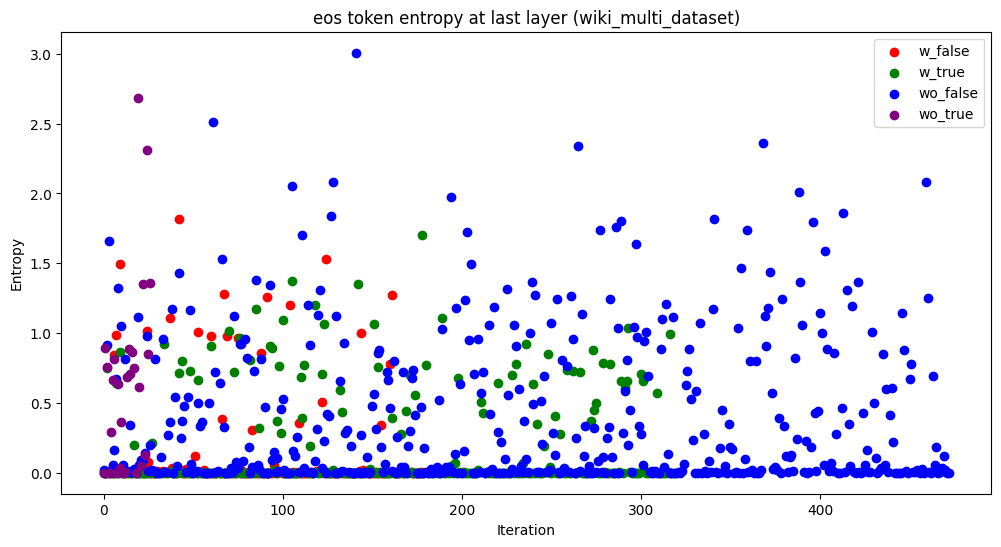

In [160]:
plt.figure(figsize=(12, 6))
for key, values in eos_subsamples.items():
    plt.scatter(range(len(values)), values, label=key, color=colors[key])

plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.title('eos token entropy at last layer (wiki_multi_dataset)')
plt.legend()
plt.show()

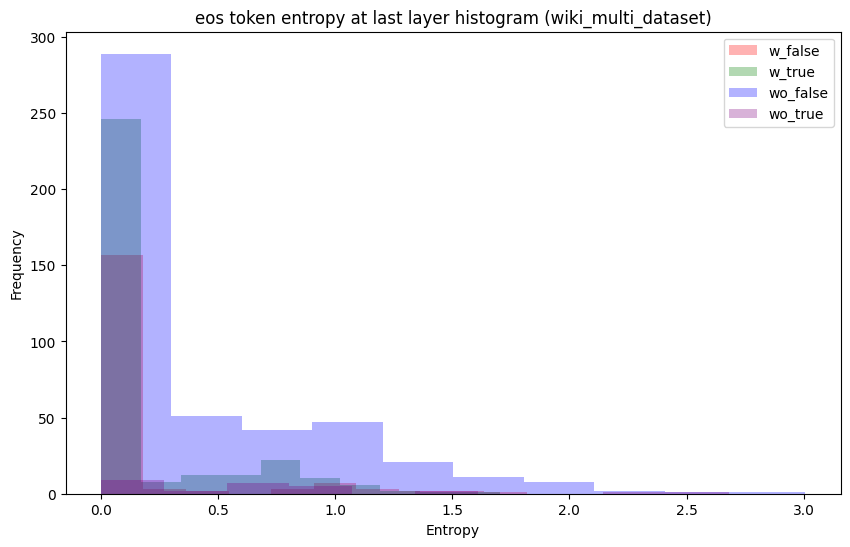

In [161]:
plt.figure(figsize=(10, 6))
for key, values in eos_subsamples.items():
    plt.hist(values, alpha=0.3, label=key, color=colors[key])

plt.title('eos token entropy at last layer histogram (wiki_multi_dataset)')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## hot_pot_dataset

In [162]:
subsamples = {}
for subsample_name in ('w_false', 'w_true', 'wo_false', 'wo_true'):
    with open(f'{DATA_PATH}/all_entropies_hot_pot_dataset_{subsample_name}.pickle', 'rb') as file:
        all_entropies = pickle.load(file)
    subsamples[subsample_name] = [entropy[0][2].item() for entropy in all_entropies]

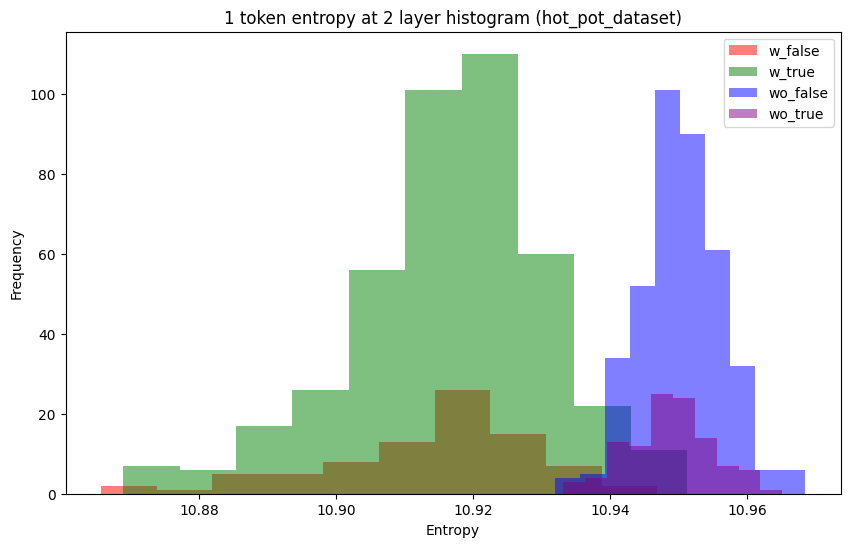

In [163]:
plt.figure(figsize=(10, 6))
for key, values in subsamples.items():
    plt.hist(values, alpha=0.5, label=key, color=colors[key])

plt.title('1 token entropy at 2 layer histogram (hot_pot_dataset)')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

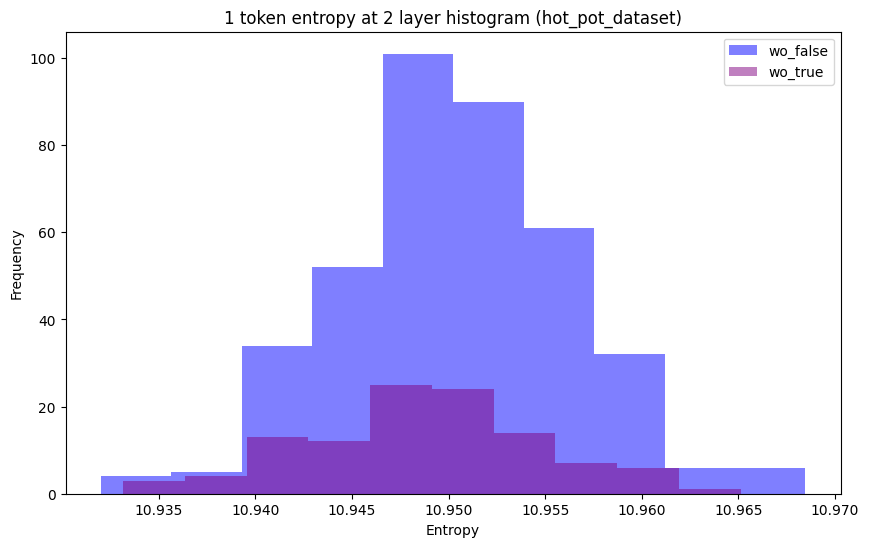

In [164]:
plt.figure(figsize=(10, 6))
for key, values in subsamples.items():
    if key in ('wo_false', 'wo_true'):
        plt.hist(values, alpha=0.5, label=key, color=colors[key])

plt.title('1 token entropy at 2 layer histogram (hot_pot_dataset)')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

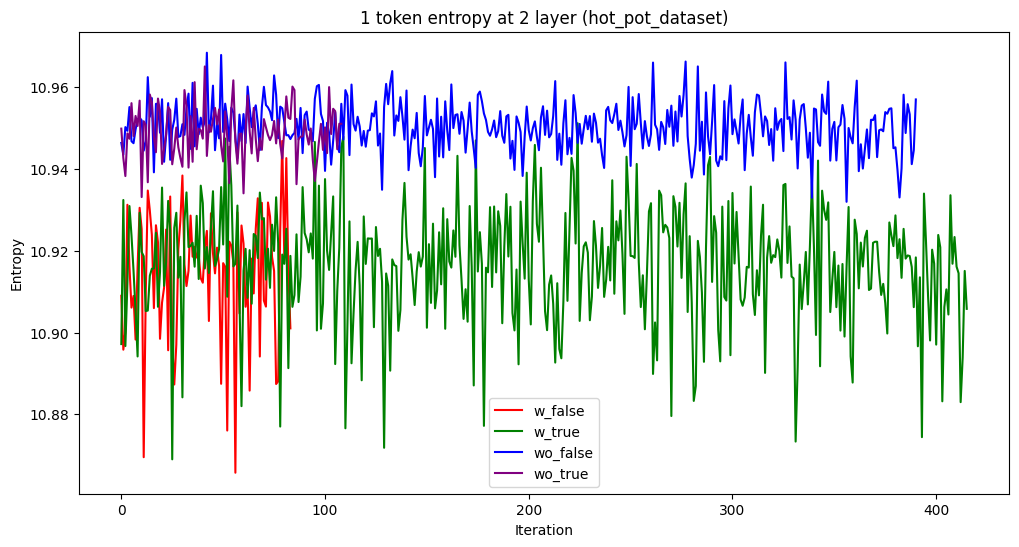

In [165]:
plt.figure(figsize=(12, 6))
for key, values in subsamples.items():
    plt.plot(values, label=key, color=colors[key])

plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.title('1 token entropy at 2 layer (hot_pot_dataset)')
plt.legend()
plt.show()

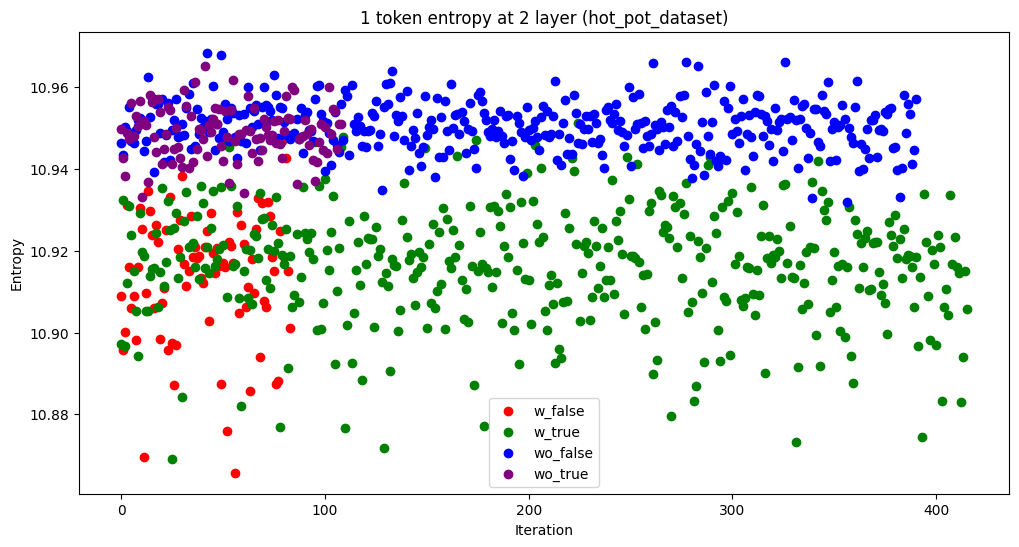

In [166]:
plt.figure(figsize=(12, 6))
for key, values in subsamples.items():
    plt.scatter(range(len(values)), values, label=key, color=colors[key])

plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.title('1 token entropy at 2 layer (hot_pot_dataset)')
plt.legend()
plt.show()

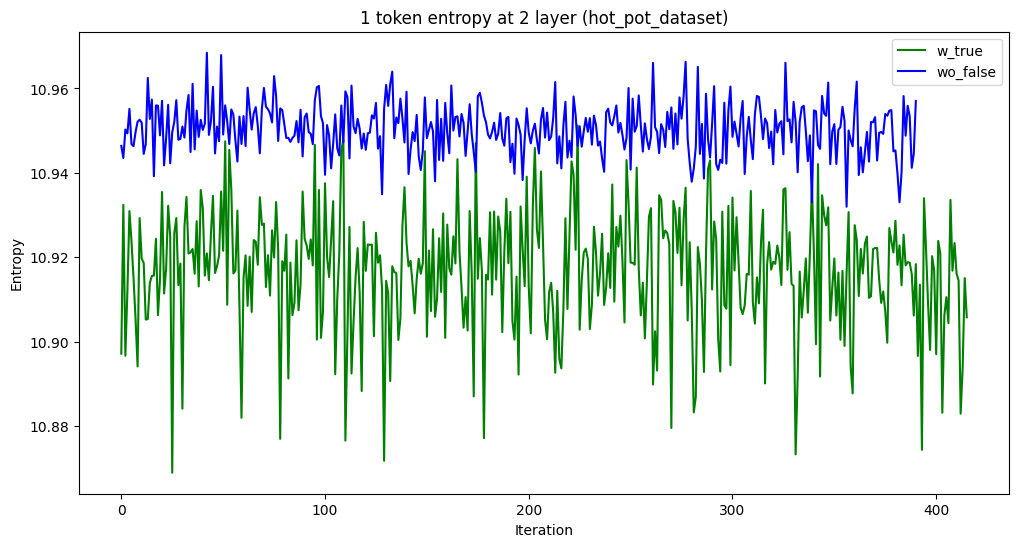

In [167]:
plt.figure(figsize=(12, 6))
for key, values in subsamples.items():
    if key in ('wo_false', 'w_true'):
        plt.plot(values, label=key, color=colors[key])

plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.title('1 token entropy at 2 layer (hot_pot_dataset)')
plt.legend()
plt.show()

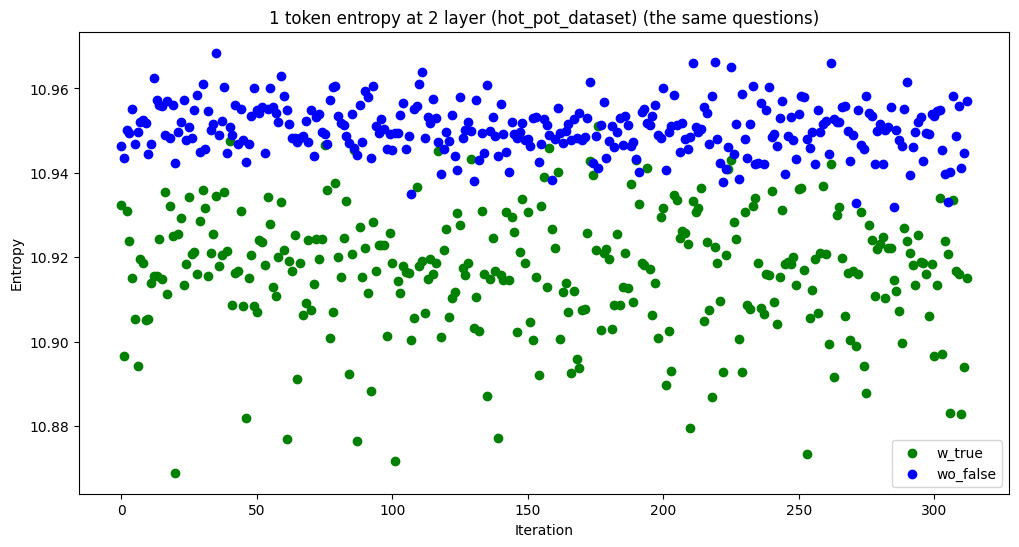

In [168]:
hot_pot_dataset = pd.read_csv('../data/adaptive_rag_hotpotqa.csv')

wo_false_indices = set(hot_pot_dataset[hot_pot_dataset['is_correct_wo_context'] == 0].index)
w_true_indices = set(hot_pot_dataset[hot_pot_dataset['is_correct_w_context'] == 1].index)

filtered_indices = wo_false_indices & w_true_indices

wo_false_idx = list(wo_false_indices)
index_map_wo_false = {i: wo_false_idx[i] for i in range(len(wo_false_idx))}
w_true_idx = list(w_true_indices)
index_map_w_true = {i: w_true_idx[i] for i in range(len(w_true_idx))}

hot_pot_dataset_entropies_wo0_w1 = {
    'w_true': [subsamples['w_true'][i] for i in range(len(subsamples['w_true']))
               if index_map_w_true.get(i) in filtered_indices],
    'wo_false': [subsamples['wo_false'][i] for i in range(len(subsamples['wo_false']))
                 if index_map_wo_false.get(i) in filtered_indices],
}

all_entropies_wo0_w1['w_true'] += hot_pot_dataset_entropies_wo0_w1['w_true']
all_entropies_wo0_w1['wo_false'] += hot_pot_dataset_entropies_wo0_w1['wo_false']

plt.figure(figsize=(12, 6))
for key, values in hot_pot_dataset_entropies_wo0_w1.items():
    plt.scatter(range(len(values)), values, label=key, color=colors[key])

plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.title('1 token entropy at 2 layer (hot_pot_dataset) (the same questions)')
plt.legend()
plt.show()

In [169]:
eos_subsamples = {}
for subsample_name in ('w_false', 'w_true', 'wo_false', 'wo_true'):
    with open(f'{DATA_PATH}/all_eos_entropies_hot_pot_dataset_{subsample_name}.pickle', 'rb') as file:
        all_entropies = pickle.load(file)
    eos_subsamples[subsample_name] = [entropy[-1].item() for entropy in all_entropies]

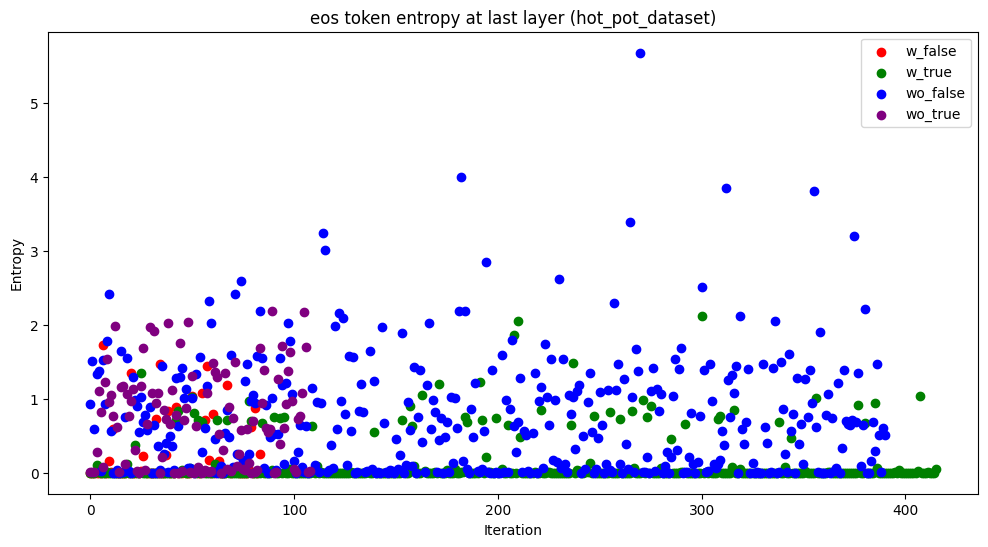

In [170]:
plt.figure(figsize=(12, 6))
for key, values in eos_subsamples.items():
    plt.scatter(range(len(values)), values, label=key, color=colors[key])

plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.title('eos token entropy at last layer (hot_pot_dataset)')
plt.legend()
plt.show()


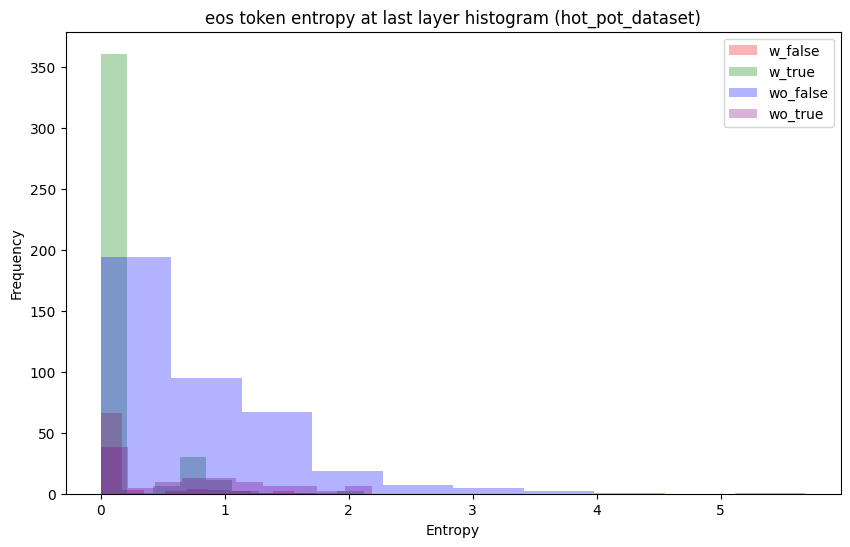

In [171]:
plt.figure(figsize=(10, 6))
for key, values in eos_subsamples.items():
    plt.hist(values, alpha=0.3, label=key, color=colors[key])

plt.title('eos token entropy at last layer histogram (hot_pot_dataset)')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## musique_dataset

In [172]:
subsamples = {}
for subsample_name in ('w_false', 'w_true', 'wo_false', 'wo_true'):
    with open(f'{DATA_PATH}/all_entropies_musique_dataset_{subsample_name}.pickle', 'rb') as file:
        all_entropies = pickle.load(file)
    subsamples[subsample_name] = [entropy[0][2].item() for entropy in all_entropies]

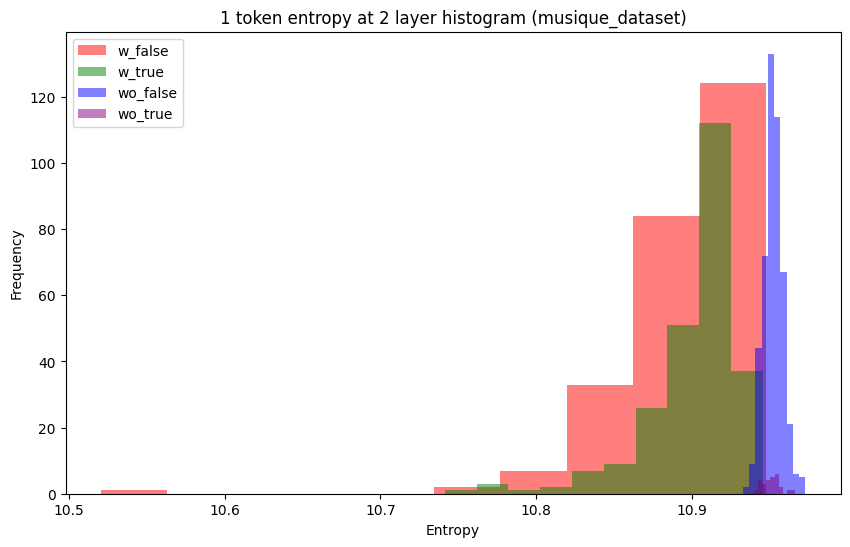

In [173]:
plt.figure(figsize=(10, 6))
for key, values in subsamples.items():
    plt.hist(values, alpha=0.5, label=key, color=colors[key])

plt.title('1 token entropy at 2 layer histogram (musique_dataset)')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

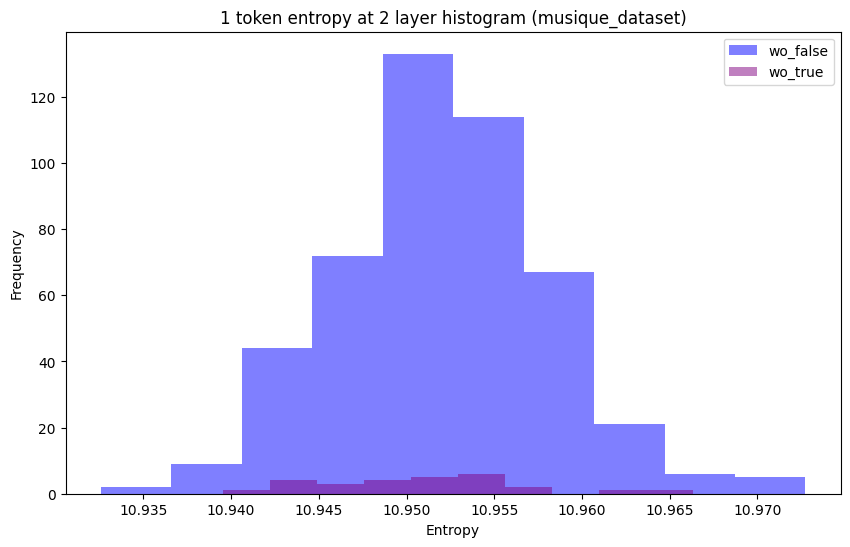

In [174]:
plt.figure(figsize=(10, 6))
for key, values in subsamples.items():
    if key in ('wo_false', 'wo_true'):
        plt.hist(values, alpha=0.5, label=key, color=colors[key])

plt.title('1 token entropy at 2 layer histogram (musique_dataset)')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

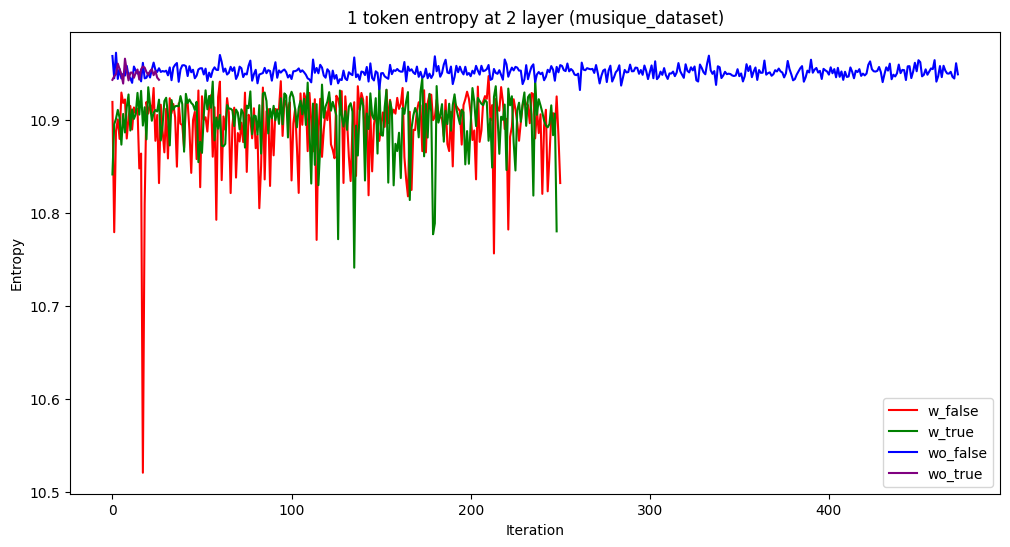

In [175]:
plt.figure(figsize=(12, 6))
for key, values in subsamples.items():
    plt.plot(values, label=key, color=colors[key])

plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.title('1 token entropy at 2 layer (musique_dataset)')
plt.legend()
plt.show()

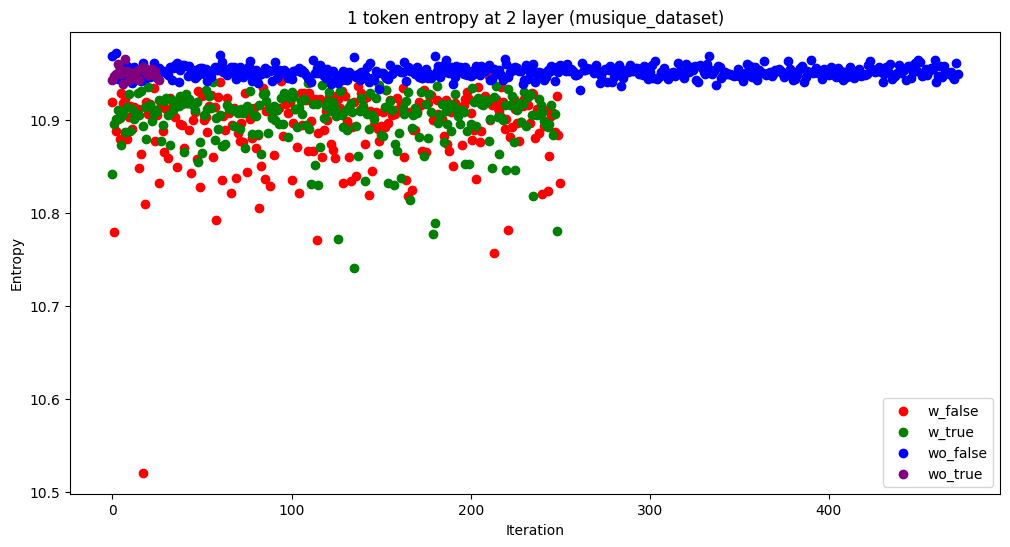

In [176]:
plt.figure(figsize=(12, 6))
for key, values in subsamples.items():
    plt.scatter(range(len(values)), values, label=key, color=colors[key])

plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.title('1 token entropy at 2 layer (musique_dataset)')
plt.legend()
plt.show()

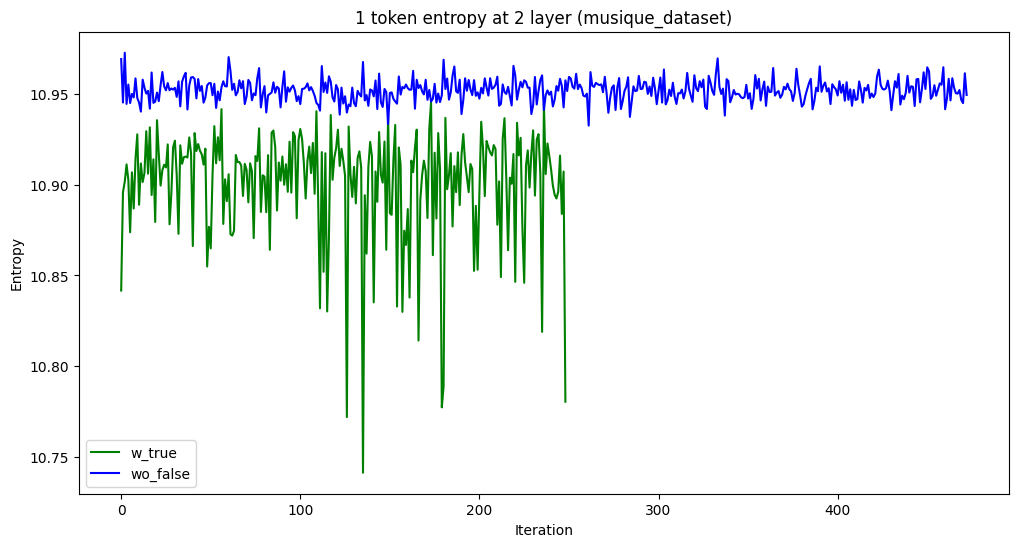

In [177]:
plt.figure(figsize=(12, 6))
for key, values in subsamples.items():
    if key in ('wo_false', 'w_true'):
        plt.plot(values, label=key, color=colors[key])

plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.title('1 token entropy at 2 layer (musique_dataset)')
plt.legend()
plt.show()

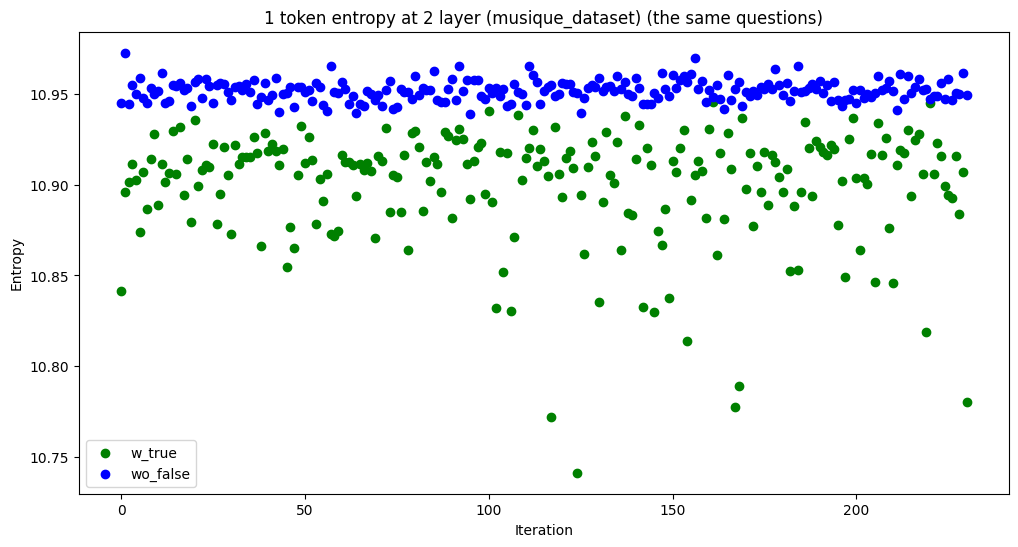

In [178]:
musique_dataset = pd.read_csv('../data/adaptive_rag_musique.csv')

wo_false_indices = set(musique_dataset[musique_dataset['is_correct_wo_context'] == 0].index)
w_true_indices = set(musique_dataset[musique_dataset['is_correct_w_context'] == 1].index)

filtered_indices = wo_false_indices & w_true_indices

wo_false_idx = list(wo_false_indices)
index_map_wo_false = {i: wo_false_idx[i] for i in range(len(wo_false_idx))}
w_true_idx = list(w_true_indices)
index_map_w_true = {i: w_true_idx[i] for i in range(len(w_true_idx))}

musique_dataset_entropies_wo0_w1 = {
    'w_true': [subsamples['w_true'][i] for i in range(len(subsamples['w_true']))
               if index_map_w_true.get(i) in filtered_indices],
    'wo_false': [subsamples['wo_false'][i] for i in range(len(subsamples['wo_false']))
                 if index_map_wo_false.get(i) in filtered_indices],
}

all_entropies_wo0_w1['w_true'] += musique_dataset_entropies_wo0_w1['w_true']
all_entropies_wo0_w1['wo_false'] += musique_dataset_entropies_wo0_w1['wo_false']

plt.figure(figsize=(12, 6))
for key, values in musique_dataset_entropies_wo0_w1.items():
    plt.scatter(range(len(values)), values, label=key, color=colors[key])

plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.title('1 token entropy at 2 layer (musique_dataset) (the same questions)')
plt.legend()
plt.show()

In [179]:
eos_subsamples = {}
for subsample_name in ('w_false', 'w_true', 'wo_false', 'wo_true'):
    with open(f'{DATA_PATH}/all_eos_entropies_musique_dataset_{subsample_name}.pickle', 'rb') as file:
        all_entropies = pickle.load(file)
    eos_subsamples[subsample_name] = [entropy[-1].item() for entropy in all_entropies]

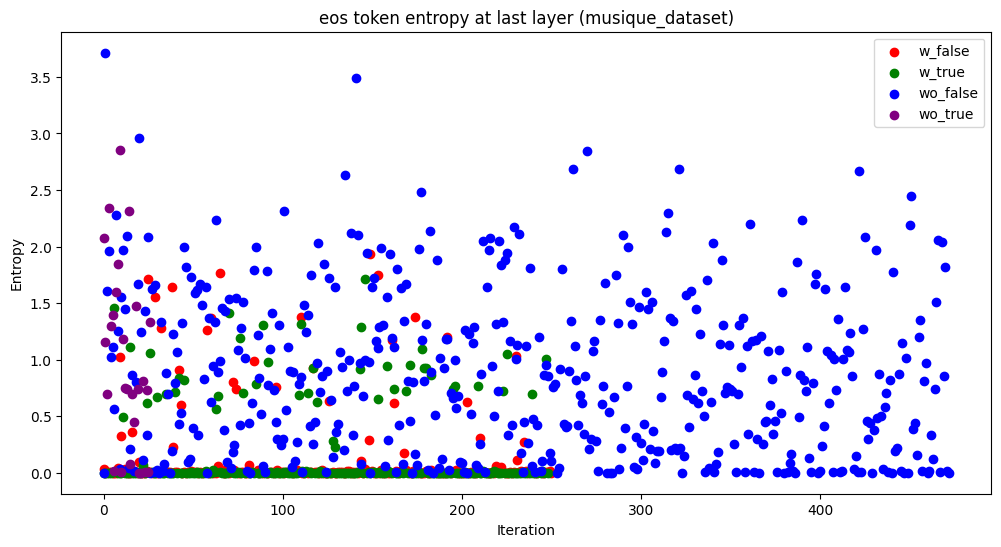

In [180]:
plt.figure(figsize=(12, 6))
for key, values in eos_subsamples.items():
    plt.scatter(range(len(values)), values, label=key, color=colors[key])

plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.title('eos token entropy at last layer (musique_dataset)')
plt.legend()
plt.show()

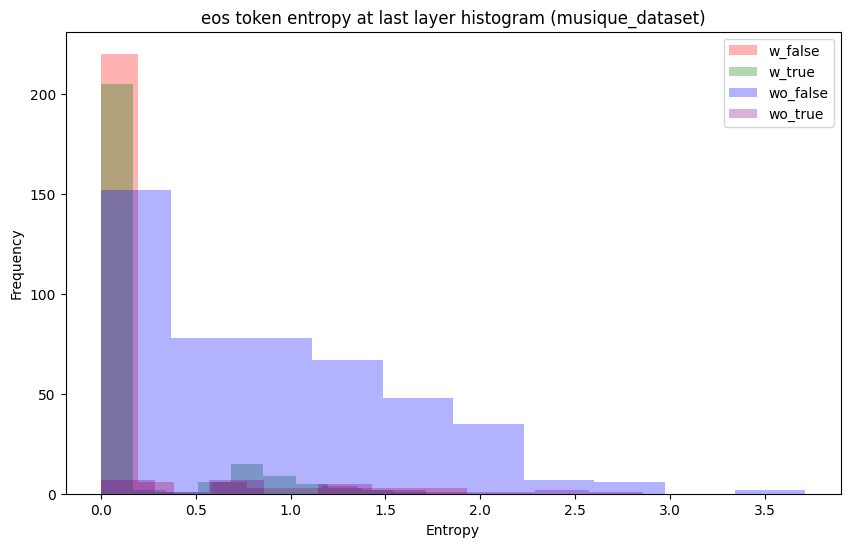

In [181]:
plt.figure(figsize=(10, 6))
for key, values in eos_subsamples.items():
    plt.hist(values, alpha=0.3, label=key, color=colors[key])

plt.title('eos token entropy at last layer histogram (musique_dataset)')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## All datasets together

In [195]:
subsamples = {}
for dataset_name in ('nq_dataset', 'wiki_multi_dataset', 'hot_pot_dataset', 'musique_dataset'):
    for subsample_name in ('w_false', 'w_true', 'wo_false', 'wo_true'):
        
        with open(f'{DATA_PATH}/all_entropies_{dataset_name}_{subsample_name}.pickle', 'rb') as file:
            all_entropies = pickle.load(file)
            
        if dataset_name == 'nq_dataset':
            subsamples[subsample_name] = [entropy[0][2].item() for entropy in all_entropies]
        else:
            subsamples[subsample_name] += [entropy[0][2].item() for entropy in all_entropies]

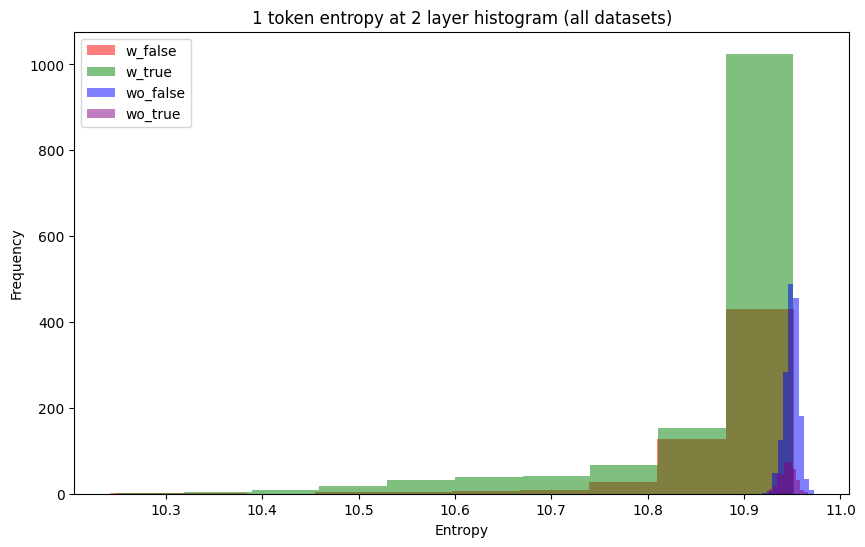

In [183]:
plt.figure(figsize=(10, 6))
for key, values in subsamples.items():
    plt.hist(values, alpha=0.5, label=key, color=colors[key])

plt.title('1 token entropy at 2 layer histogram (all datasets)')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

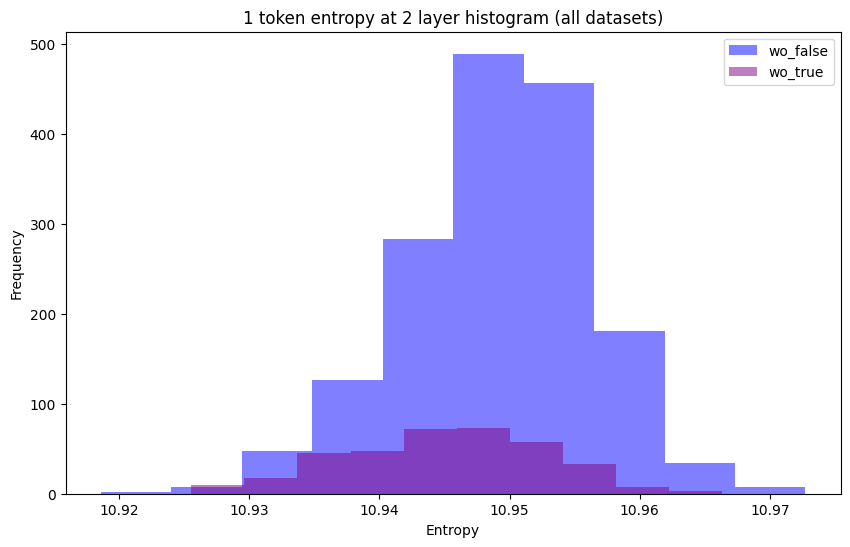

In [184]:
plt.figure(figsize=(10, 6))
for key, values in subsamples.items():
    if key in ('wo_false', 'wo_true'):
        plt.hist(values, alpha=0.5, label=key, color=colors[key])

plt.title('1 token entropy at 2 layer histogram (all datasets)')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

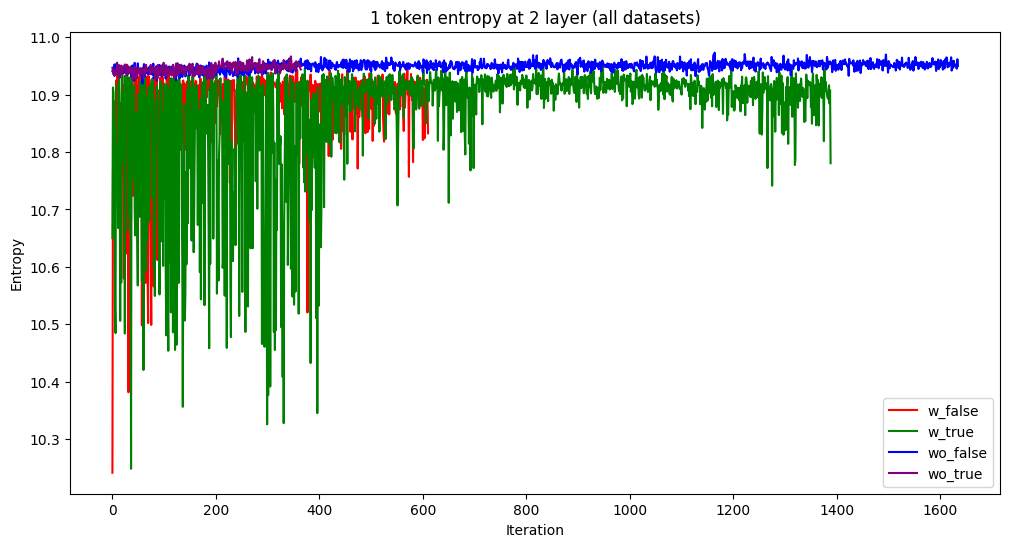

In [185]:
plt.figure(figsize=(12, 6))
for key, values in subsamples.items():
    plt.plot(values, label=key, color=colors[key])

plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.title('1 token entropy at 2 layer (all datasets)')
plt.legend()
plt.show()

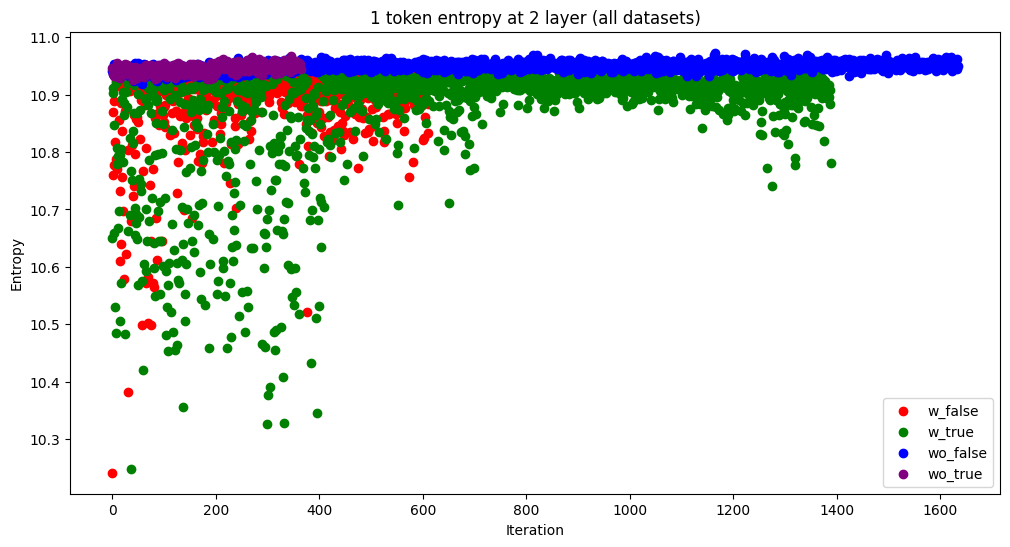

In [186]:
plt.figure(figsize=(12, 6))
for key, values in subsamples.items():
    plt.scatter(range(len(values)), values, label=key, color=colors[key])

plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.title('1 token entropy at 2 layer (all datasets)')
plt.legend()
plt.show()

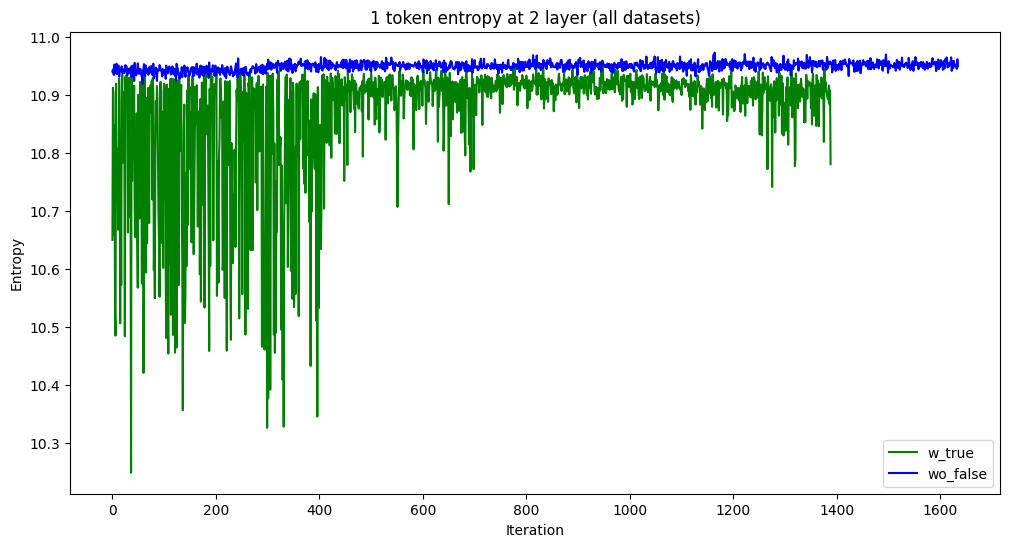

In [187]:
plt.figure(figsize=(12, 6))
for key, values in subsamples.items():
    if key in ('wo_false', 'w_true'):
        plt.plot(values, label=key, color=colors[key])

plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.title('1 token entropy at 2 layer (all datasets)')
plt.legend()
plt.show()

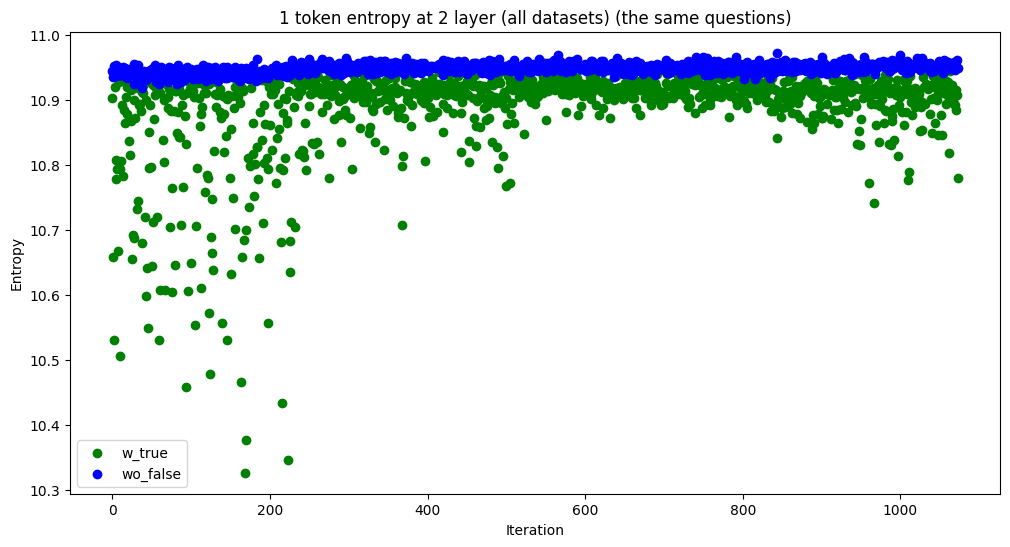

In [188]:
plt.figure(figsize=(12, 6))
for key, values in all_entropies_wo0_w1.items():
    plt.scatter(range(len(values)), values, label=key, color=colors[key])

plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.title('1 token entropy at 2 layer (all datasets) (the same questions)')
plt.legend()
plt.show()

/tmp/ipykernel_3451367/2808402273.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=labels, y=data, palette=colors)


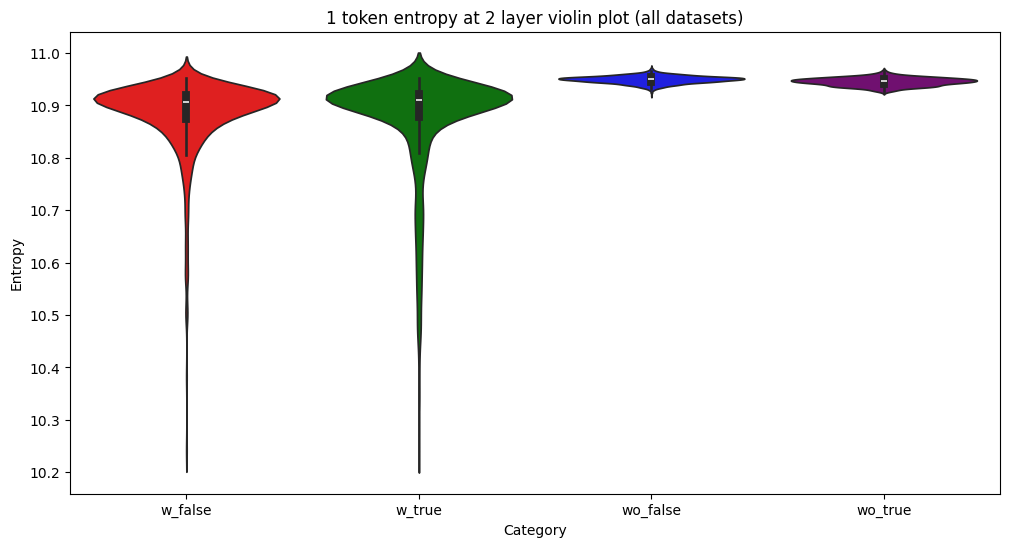

In [196]:
data = []
labels = []
for key, values in subsamples.items():
    data.extend(values)
    labels.extend([key] * len(values))

plt.figure(figsize=(12, 6))
sns.violinplot(x=labels, y=data, palette=colors)

plt.title('1 token entropy at 2 layer violin plot (all datasets)')
plt.xlabel('Category')
plt.ylabel('Entropy')
plt.show()

In [189]:
eos_subsamples = {}
for dataset_name in ('nq_dataset', 'wiki_multi_dataset', 'hot_pot_dataset', 'musique_dataset'):
    for subsample_name in ('w_false', 'w_true', 'wo_false', 'wo_true'):
        
        with open(f'{DATA_PATH}/all_eos_entropies_{dataset_name}_{subsample_name}.pickle', 'rb') as file:
            all_entropies = pickle.load(file)
            
        if dataset_name == 'nq_dataset':
            eos_subsamples[subsample_name] = [entropy[-1].item() for entropy in all_entropies]
        else:
            eos_subsamples[subsample_name] += [entropy[-1].item() for entropy in all_entropies]

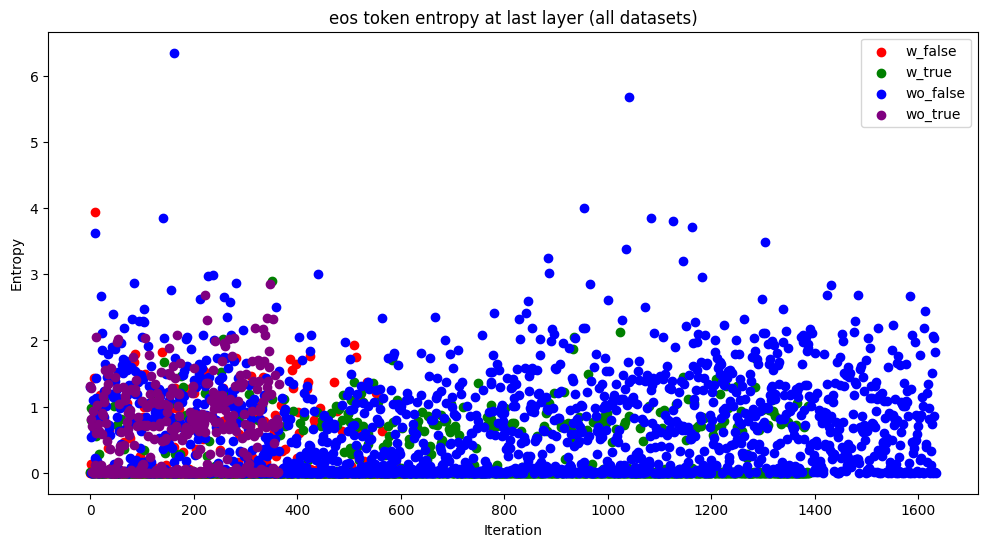

In [190]:
plt.figure(figsize=(12, 6))
for key, values in eos_subsamples.items():
    plt.scatter(range(len(values)), values, label=key, color=colors[key])

plt.xlabel('Iteration')
plt.ylabel('Entropy')
plt.title('eos token entropy at last layer (all datasets)')
plt.legend()
plt.show()

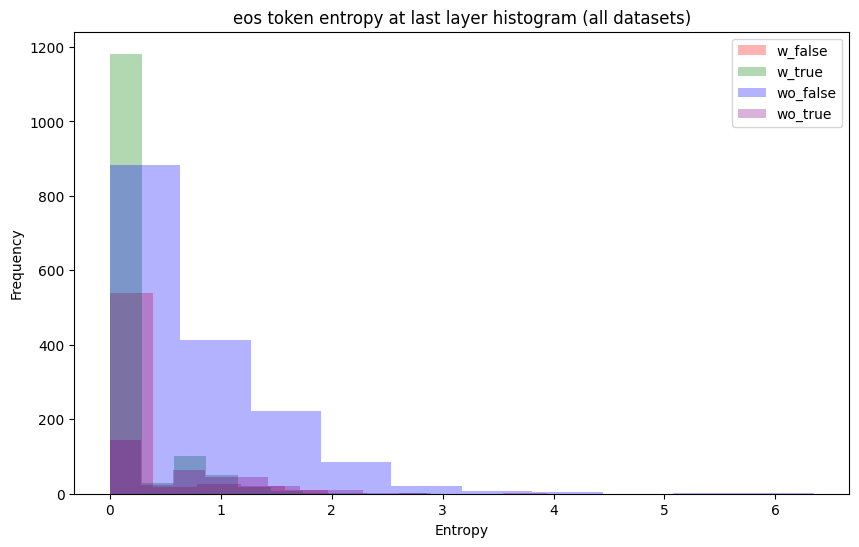

In [191]:
plt.figure(figsize=(10, 6))
for key, values in eos_subsamples.items():
    plt.hist(values, alpha=0.3, label=key, color=colors[key])

plt.title('eos token entropy at last layer histogram (all datasets)')
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.legend()
plt.show()

/tmp/ipykernel_3451367/2044233991.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=labels, y=data, palette=colors)


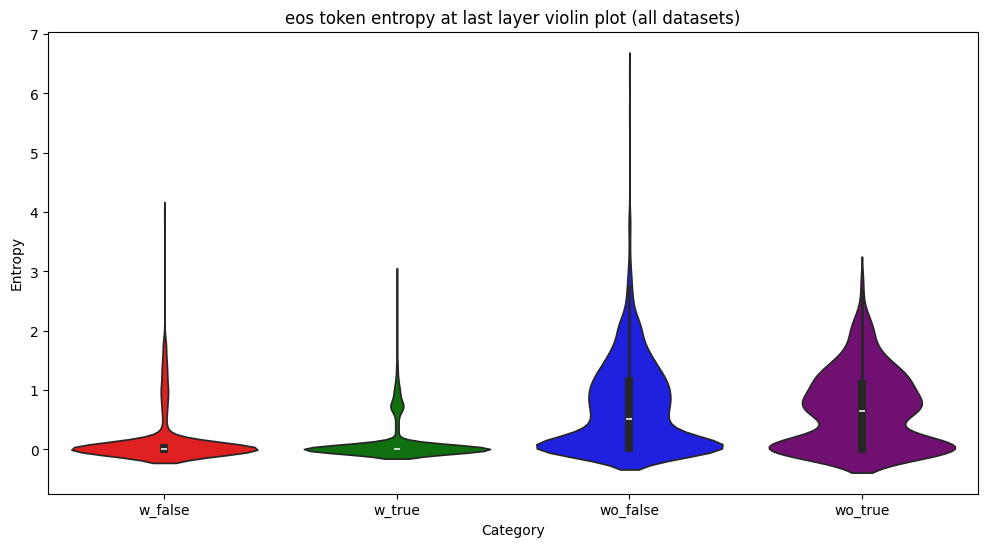

In [197]:
data = []
labels = []
for key, values in eos_subsamples.items():
    data.extend(values)
    labels.extend([key] * len(values))

plt.figure(figsize=(12, 6))
sns.violinplot(x=labels, y=data, palette=colors)

plt.title('eos token entropy at last layer violin plot (all datasets)')
plt.xlabel('Category')
plt.ylabel('Entropy')
plt.show()